## Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sb
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

C:\Users\Fabrizio\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:/Users/Fabrizio/Desktop/marketing_data.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,Location,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,Naples,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,Firenze,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,Milano,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,Naples,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,Napoli,unknown,no


In [4]:
df.shape

(43097, 17)

## Delete NaN values 

In [5]:
df.isna().sum()

age          23
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      58
day           0
month         0
campaign      0
pdays         0
previous      0
Location      0
poutcome     10
y             0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
Location     0
poutcome     0
y            0
dtype: int64

In [8]:
df.shape

(43006, 17)

## Convert binary variables into numeric ones

In [9]:
df = df.replace({'yes': 1, 'no': 0})

## Let's see alle the features of type "object". the goal is to correct mistakes and convert them into numeric features

In [10]:
df.dtypes

age          float64
job           object
marital       object
education     object
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
campaign       int64
pdays          int64
previous       int64
Location      object
poutcome      object
y              int64
dtype: object

In [11]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'divrcd', 'S', 'Singl', 'Single'],
      dtype=object)

## Spelling errors separate  categories which are the same: let's fix it. The category "S" is probably a mistake and should be erased

In [13]:
df['marital'] = df['marital'].replace({'divrcd': 'divorced', 'Singl' : 'Single', 'single' : 'Single'})
df = df[df['marital'] != 'S']

In [14]:
df['marital'].unique()

array(['married', 'Single', 'divorced'], dtype=object)

In [15]:
df['marital'].value_counts()

married     26046
Single      11972
divorced     4949
Name: marital, dtype: int64

In [16]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df['Location'].unique()

array(['Naples', 'Firenze', 'Milano', 'Napoli', 'Rome', 'Genoa',
       'Barcellona', 'Parigi', 'Milan', 'Bologna', 'Paris', 'London',
       'Roma', 'Genova', 'Turin', 'Londra', 'Bolgna', 'Venezia', 'Torino',
       'Bari', 'Alessandria', 'Venezoia', 'Florence', 'rome', 'Veneza',
       'Lndon'], dtype=object)

In [18]:
df['Location'] = df['Location'].replace({'Venezoia': 'Venezia', 'Veneza' : 'Venezia','Lndon' : 'Londra', 'London' : 'Londra', 'Turin' : 'Torino', 'Milan' : 'Milano', 'Naples' : 'Napoli', 'Paris' : 'Parigi', 'Florence' : 'Firenze', 'Genoa' : 'Genova', 'rome' : 'Roma', 'Rome' : 'Roma', 'Bolgna' : 'Bologna'})


In [19]:
df['Location'].unique()

array(['Napoli', 'Firenze', 'Milano', 'Roma', 'Genova', 'Barcellona',
       'Parigi', 'Bologna', 'Londra', 'Torino', 'Venezia', 'Bari',
       'Alessandria'], dtype=object)

In [20]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [21]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [22]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

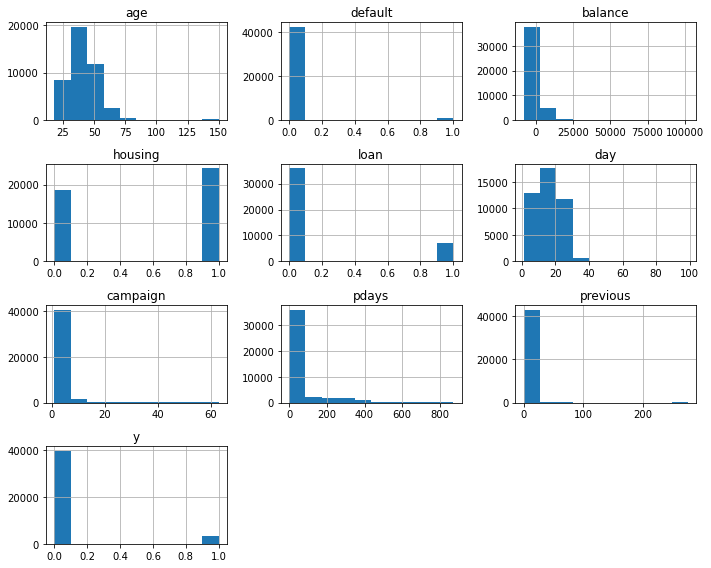

In [23]:
df.hist(figsize=(10, 8))
plt.tight_layout()  
plt.show()

In [24]:
df['y'].value_counts()

0    39803
1     3164
Name: y, dtype: int64

In [25]:
3164/39803

0.07949149561590835

## Remark: we are dealing with unblanced datasets, accuracy alone might not be a good representative for the classification model

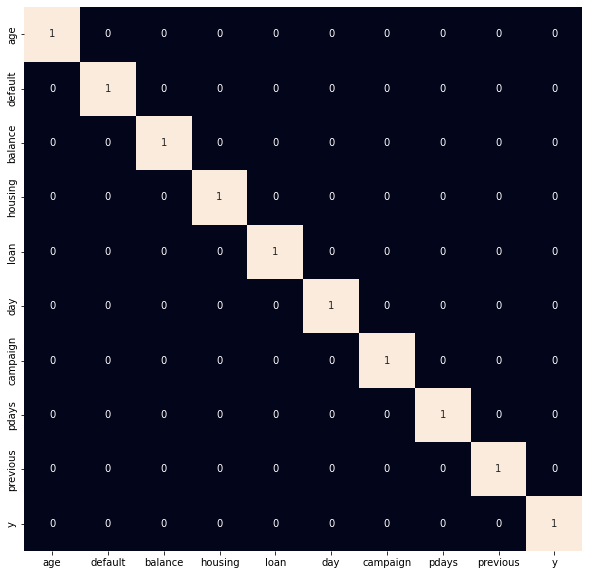

In [26]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

## No highly correlated variables seem to be present. remove outliers:

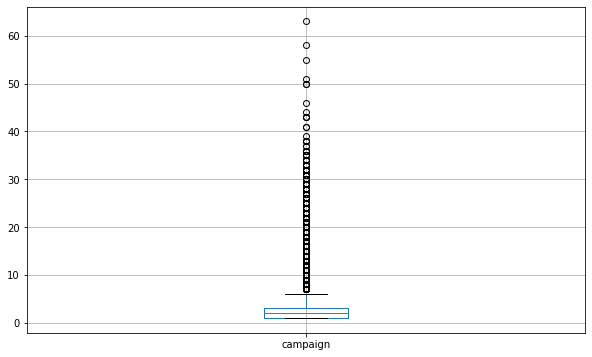

In [27]:
df[['campaign']].boxplot(figsize=(10, 6))
plt.show()

In [28]:
np.mean(df['campaign'])

2.799287825540531

In [29]:
df = df[(df['campaign'] <8)]

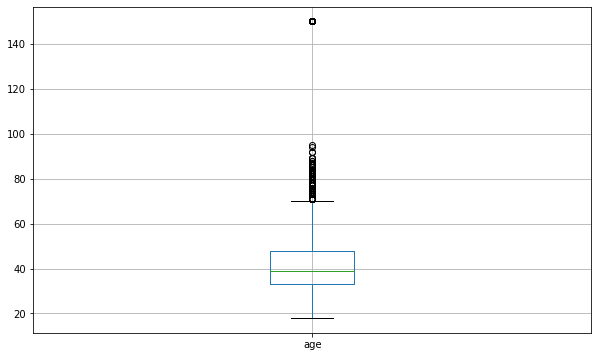

In [30]:
df[['age']].boxplot(figsize=(10, 6))
plt.show()

In [31]:
df = df[(df['campaign'] <70)]

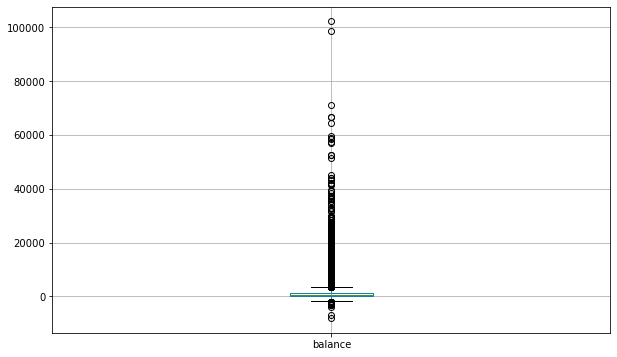

In [32]:
df[['balance']].boxplot(figsize=(10, 6))
plt.show()

In [33]:
df = df[(df['balance'] <= 3000) & (df['balance'] >= -1500)]


In [34]:
df.shape

(35626, 17)

## Let's drop features not helpful for the prediction:

In [35]:
df = df.drop(columns=['contact','month','day','pdays'])

## Convert into dummies to deal only with numerical variables:

In [36]:
encoded_df = pd.get_dummies(df[['job','marital','Location','poutcome','education']], drop_first=True)

In [37]:
df = pd.concat([df.drop(['job','marital','Location','poutcome','education'], axis=1), encoded_df], axis=1)

In [38]:
df.dtypes

age                    float64
default                  int64
balance                  int64
housing                  int64
loan                     int64
campaign                 int64
previous                 int64
y                        int64
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
Location_Barcellona      uint8
Location_Bari            uint8
Location_Bologna         uint8
Location_Firenze         uint8
Location_Genova          uint8
Location_Londra          uint8
Location_Milano          uint8
Location_Napoli          uint8
Location_Parigi          uint8
Location_Roma            uint8
Location_Torino          uint8
Location

## Let's split into train/test and normalize data:

In [51]:
X = df.drop(columns = ['y']).values
y= df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [40]:
pip install imbalanced-learn

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)Note: you may need to restart the kernel to use updated packages.



ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\Fabrizio\\AppData\\Local\\Temp\\pip-uninstall-k7nm0sci\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)


In [42]:
X_train.shape

(46264, 38)

In [43]:
X_test.shape

(10688, 38)

In [47]:
np.sum(y_train==0)

23132

## Let's try 3 classifier models: Logistic regression, gradient boosting and random forrest:

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

class_weight = {0: 1, 1: 12}  
rf_classifier = RandomForestClassifier(class_weight = class_weight,random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_classifier = grid_search.best_estimator_

y_pred_test = best_rf_classifier.predict(X_test)
test_f1_score = f1_score(y_test, y_pred_test)
print("Test F1 Score after Hyperparameter Tuning:", test_f1_score) 


Best Parameters: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test F1 Score after Hyperparameter Tuning: 0.3100936524453694


In [56]:
accuracy_score(y_test, y_pred_test)

0.9255641630178512

In [ ]:
models = [LogisticRegression(), XGBClassifier(),RandomForestClassifier()]

acc_test = []

acc_train = []

f1_test = []

f1_train = []


for model in models:
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    acc_train.append(accuracy_score(model.predict(X_train), y_train))

    acc_test.append(accuracy_score(predictions, y_test))
    
    f1_train.append(f1_score(model.predict(X_train), y_train))

    f1_test.append(f1_score(predictions, y_test))
    

print(" TRAINING ACCURACY " ,acc_train)

print(" VALIDATION ACCURACY " ,acc_test)


print(" TRAINING F1 " ,f1_train)

print(" VALIDATION F1 " ,f1_test)

In [48]:
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier()]

acc_train = []
acc_test = []
f1_train = []
f1_test = []



for model in models:
    acc_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    acc_train.append(acc_scores.mean())
    f1_train.append(f1_scores.mean())

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    acc_test.append(accuracy_score(predictions, y_test))
    f1_test.append(f1_score(predictions, y_test))

print("Accuracy (Train):", acc_train)
print("Accuracy (Test):", acc_test)
print("F1 Score (Train):", f1_train)
print("F1 Score (Test):", f1_test)

Accuracy (Train): [0.6677979177737379, 0.9456387521855826, 0.9516475207279032]
Accuracy (Test): [0.7171594311377245, 0.9270209580838323, 0.9161676646706587]
F1 Score (Train): [0.6498153957360933, 0.9367793731465989, 0.9470561020107919]
F1 Score (Test): [0.22823589481746234, 0.20408163265306123, 0.22891566265060243]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

ìmodels = [
    (LogisticRegression(class_weight=class_weight), {'C': [0.1, 1, 10]}),
    (XGBClassifier(), {'learning_rate': [0.1, 0.01], 'max_depth': [3, 5]}),
    (RandomForestClassifier(), {'n_estimators': [50, 100, 200]})
]

acc_test = []
acc_train = []
f1_test = []
f1_train = []

for model, param_grid in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    best_model.fit(X_train, y_train)
    
    predictions = best_model.predict(X_test)

    acc_train.append(accuracy_score(best_model.predict(X_train), y_train))
    acc_test.append(accuracy_score(predictions, y_test))

    f1_train.append(f1_score(best_model.predict(X_train), y_train))
    f1_test.append(f1_score(predictions, y_test))

print("TRAINING ACCURACY:", acc_train)
print("VALIDATION ACCURACY:", acc_test)
print("TRAINING F1:", f1_train)
print("VALIDATION F1:", f1_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

class_weight = {0: 1, 1: 2}  

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5), 
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Subscription', 'Subscription']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


C:\Users\Fabrizio\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


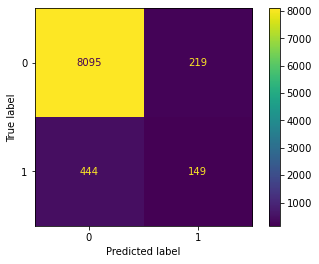

In [58]:
metrics.plot_confusion_matrix(best_rf_classifier, X_test, y_test)
plt.show()

## The model accuracy is high, but the less represented class is still not predicted very good: this is indicated by the difference between accuracy and f1-score, such as from the confusion matrix. We would need more data to improve results. Suggestions can be also to try to imrpvoe feature selection or extraction, and to use weighted models.

# NLP

Disclaimer: I never worked for or seriously studied this field. As far as I know, NLP is a subfield of Artificial intelligence which wants to make computers understand language data, such as text.
The required task should go under the area of Sentiment analysis. I have only saw it briefly on my own as implemented in  the package nltk, but I admit I never studied the theory behind. I also have some familiarity with methods to infer about a word importance in documents such as TF-IDF.
